# Detección de Idiomas - Naive Bayes

### Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Cargar el dataset

In [2]:
df = pd.read_csv("dataset/updated_language_detection.csv")
df.describe()

,Text,Language
count,21821,21821
unique,21821,22
top,aprilie sonda spațială messenger a nasa și-a ...,Japanese
freq,1,1000


### Dividir el dataset en conjuntos de entrenamiento y prueba

Se utiliza stratify para mantener la proporción de clases en los conjuntos de entrenamiento y prueba.

In [3]:
X = df['Text']
y = df['Language']

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Language'], test_size=0.2, random_state=42, stratify=df['Language'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17456,), (4365,), (17456,), (4365,))

### Convertir texto a Bag of Words

In [4]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

### Entrenar el modelo

In [5]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

MultinomialNB()

### Evaluar el modelo

In [6]:
y_pred = nb_model.predict(X_test_bow)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9702176403207331

Classification Report:
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       199
     Chinese       0.73      0.85      0.79       200
       Dutch       0.98      0.97      0.98       199
     English       0.83      1.00      0.90       200
    Estonian       0.99      0.98      0.99       200
      French       0.97      1.00      0.99       198
       Hindi       0.99      1.00      1.00       197
  Indonesian       0.99      0.99      0.99       194
    Japanese       0.99      0.60      0.75       200
      Korean       1.00      0.98      0.99       200
       Latin       1.00      0.97      0.99       190
     Persian       1.00      1.00      1.00       200
   Portugese       0.99      0.99      0.99       199
      Pushto       1.00      1.00      1.00       197
    Romanian       0.99      1.00      0.99       200
     Russian       1.00      0.99      1.00       200
     Spanish       0.98    

#### Reporte de Clasificación

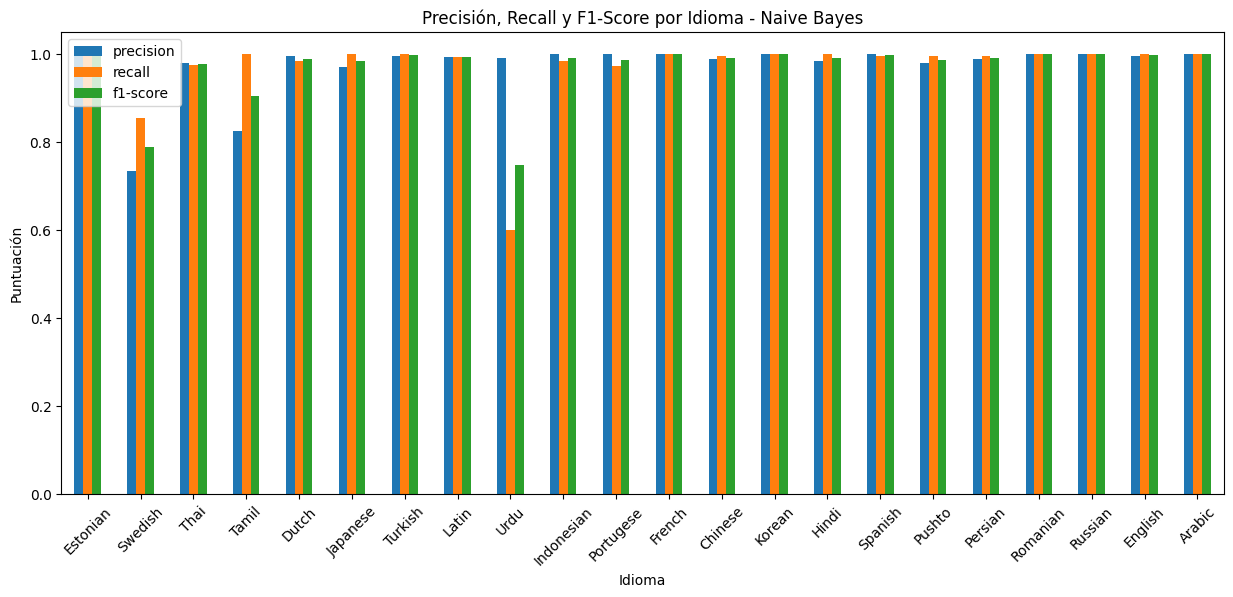

<Figure size 640x480 with 0 Axes>

In [7]:
language_names = df['Language'].unique()
report_dict = classification_report(y_test, y_pred, target_names=language_names, output_dict=True)
report_df = pd.DataFrame(report_dict).T[:-3]

report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(15, 6))
plt.title("Precisión, Recall y F1-Score por Idioma - Naive Bayes")
plt.ylabel("Puntuación")
plt.xlabel("Idioma")
plt.xticks(rotation=45)
plt.show()
plt.savefig("plots/nb_precision_recall_f1.png")

In [8]:
for i in range(15,20):
    print("Text: ", X_test.iloc[i])
    print("Actual Language: ", y_test.iloc[i])
    print("Predicted Language: ", y_pred[i], "\n")

Text:  phytomyza banffensis este o specie de muște din genul phytomyza familia agromyzidae descrisă de spencer în anul  conform catalogue of life specia phytomyza banffensis nu are subspecii cunoscute
Actual Language:  Romanian
Predicted Language:  Romanian 

Text:  د کیلو اوبتل په روسي کېподводные лодки проекта  د ډیزل روسي شوروي پوځي تحت البحري بیړۍ ده چې د دښمن اوبتلونو او بيړییو دمنځه وړولو لپاره ورڅخه کار اخيستل کېږي دغه اوبتل د روبین د طراحي د شرکت لخوا د  او  کلونو تر منځ جوړېدې د کیلو اوبتل په  کلونو کې طرح شو او روسي بحري ځواک د دغه اوبتل څخه په رسمی ډول د  کال څخه کار واخیست په  کلنو کې د کیلو اوبتل ایران الجزایر چين هندوستان پولنډ رومانیا او ویتنام ته صادر شو د کیلو اوبتل د دوې تنې لري د اوبتل باندینی تنه هدرودینمیکي ده او د خاصي مادې څخه جوړه شوی ده چی د حرکت په وخت کې د اوبو ډېر لږ مقاومت تشکیلوي د اوبتل داخلي تنه د پولاد څخه جوړه شوی ده او په شپږ برخو تقسیم شوي ده د کیلو اوبتل د  مترو ژوروالي ته د ډوبیدو قابلیت لري
Actual Language:  Pushto
Predicted Language:  Pushto 

Te

#### Matriz de Confusión

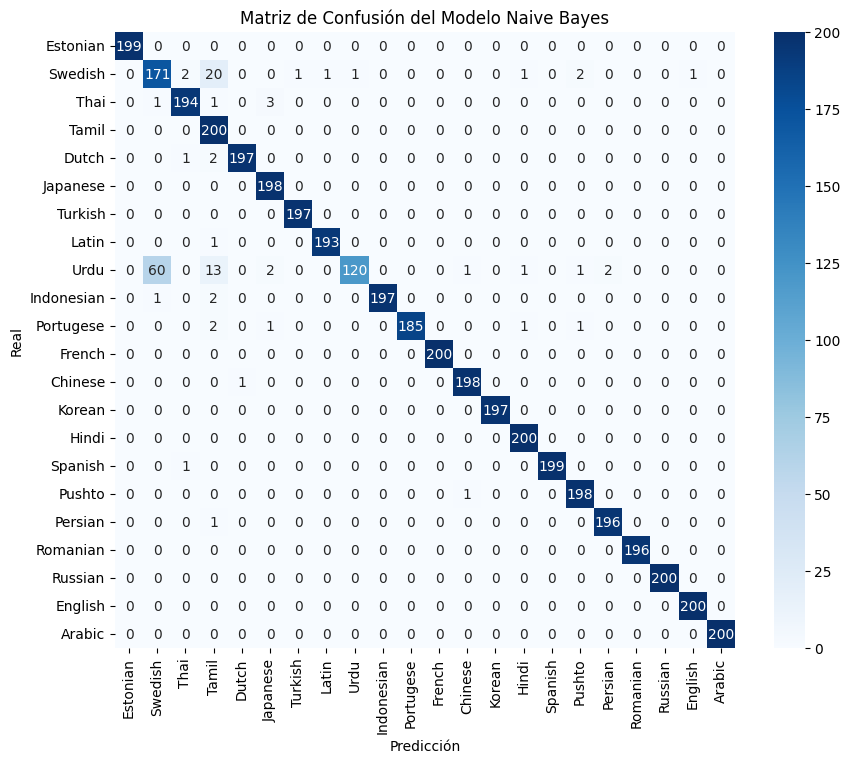

<Figure size 640x480 with 0 Axes>

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['Language'].unique(), yticklabels=df['Language'].unique())
plt.title("Matriz de Confusión del Modelo Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
plt.savefig("plots/nb_confusion_matrix.png")

### Matriz de Confusión Normalizada

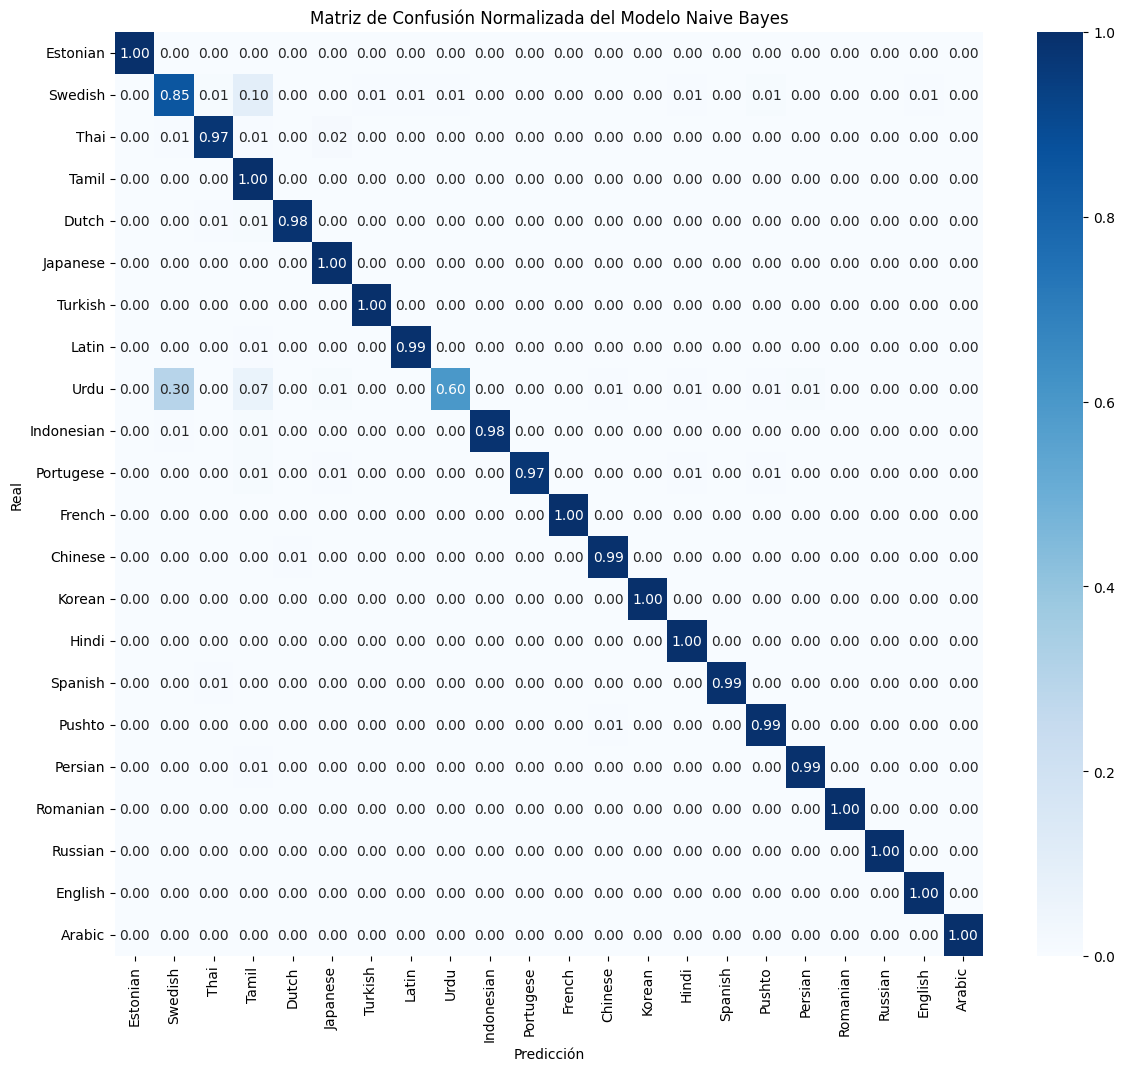

<Figure size 640x480 with 0 Axes>

In [12]:
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=df['Language'].unique(), yticklabels=df['Language'].unique())
plt.title("Matriz de Confusión Normalizada del Modelo Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
plt.savefig("plots/nb_confusion_matrix_normalized.png")